<a href="https://colab.research.google.com/github/bksgupta/visualizing_neural_nets/blob/master/neural_network_manifolds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


first x is  (20000,)
first y is  (20000,)
first label is  (20000,)


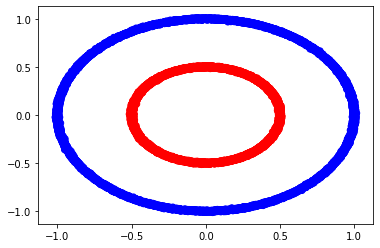

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy import special
%matplotlib inline
from keras import backend as K

n=20000
# n=2000
t = np.linspace(0,2,n)
x = np.sin(np.pi*t) + np.random.normal(0,.005,n)
y = np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = np.ones(n)

tdf = pd.DataFrame({'label' : label, 'x' : x, 'y' : y})
print ('first x is ', x.shape)
print ('first y is ', y.shape)
print ('first label is ', label.shape)

t = np.linspace(0,2,n)
x = .5*np.sin(np.pi*t) + np.random.normal(0,.005,n)
y = .5*np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = 0.*np.ones(n)

df = pd.concat([tdf, pd.DataFrame({'label' : label, 'x' : x, 'y' : y})])
plt.scatter(df['x'],df['y'], color=df['label'].apply(lambda s :  'b' if s > .3 else 'r'))


In [0]:
def get_decision_boundary(model):
    """ Function to return the x-y coodinates of the decision boundary given a model.
        This assumes the second to last hidden layer is a 2 hidden unit layer with a bias term
        and sigmoid activation on the last layer."""
    a = model.layers[-1].get_weights()[0][0][0]
    b = model.layers[-1].get_weights()[0][1][0]
    c = model.layers[-1].get_weights()[1][0]
    decision_x = np.linspace(-1,1,100)
    decision_y = (special.logit(.5)-c-a*decision_x)/b
    return decision_x, decision_y


In [0]:
from keras import backend as K
import numpy as np
i = K.placeholder(shape=(4,), name='input')
square = K.square(i)

f = K.function([i], [square])
ival = np.ones((4,))*6
orig_vals = f([ival])

In [0]:
print (orig_vals)
print (orig_vals[0].shape)

[array([36., 36., 36., 36.], dtype=float32)]
(4,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(3, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
sgd = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=sgd,
              # loss='mse',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(df[['x','y']].values, df[['label']].values, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
40000/40000 [==============================] - 4s 100us/step - loss: 0.6929 - acc: 0.5368
Epoch 2/50
40000/40000 [==============================] - 3s 85us/step - loss: 0.6920 - acc: 0.5939
Epoch 3/50
40000/40000 [==============================] - 3s 87us/step - loss: 0.6908 - acc: 0.6842
Epoch 4/50
40000/40000 [==============================] - 3s 81us/step - loss: 0.6892 - acc: 0.6566
Epoch 5/50
40000/40000 [==============================] - 3s 83us/step - loss: 0.6867 - acc: 0.7688
Epoch 6/50
40000/40000 [==============================] - 4s 92us/step - loss: 0.6830 - acc: 0.7194
Epoch 7/50
40000/40000 [==============================] - 3s 84us/step - loss: 0.6770 - acc: 0.7285
Epoch 8/50
40000/40000 [==============================] - 4s 92us/step - loss: 0.6670 - acc: 0.7580
Epoch 9/50
40000/40000 [==============================] - 3s 83us/step - loss: 0.6506 - acc: 0.7800
Epoch 10/50
40000/40000 [==============================] - 3s 85us/step - loss: 0.6250 - acc: 0.804

In [0]:
import numpy as np
a = np.array([1,2,3])
print (a)
print (a.shape)
a = a.reshape((3,1))
print (a)

[1 2 3]
(3,)
[[1]
 [2]
 [3]]


In [0]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    print ('y shape is ',y.shape)
    print ('xx shape is ',xx.shape)
    print ('hello shape is ',X[:,0].shape)
    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y.reshape(*X[:,0].shape), cmap=cmap, lw=0)

    return fig, ax


[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


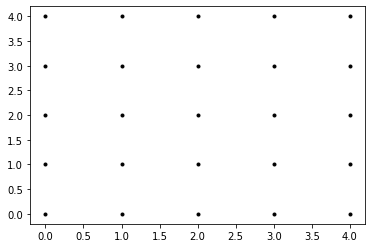

In [0]:
import numpy as np
import matplotlib.pyplot as plt
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);

xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')
print (xx)
print (yy)
print (xx.ravel())
print (yy.ravel())

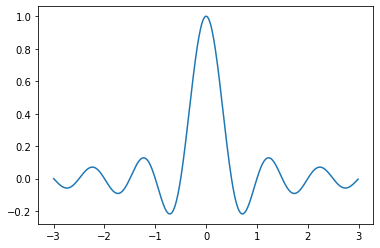

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.01)
j = 1
y = np.sin( np.pi*x*j ) / ( np.pi*x*j )
fig = plt.figure()
ax = fig.add_subplot(111)
#plot a line along points x,y
line, = ax.plot(x, y)
# plt.show()
#update data
j = 2
y2 = np.sin( np.pi*x*j ) / ( np.pi*x*j )
#update the line with the new data
line.set_ydata(y2)

plt.show()

y shape is  (40000, 1)
xx shape is  (1000, 1000)
hello shape is  (40000,)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9656fdc358>)

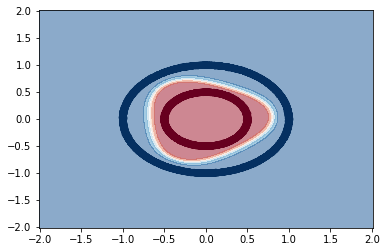

In [0]:
plot_decision_boundary(df[['x','y']].values, df[['label']].values, model, cmap='RdBu')

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from keras import backend as K

def animate_model(model, n_frames=100):
    """ Function to animate a model's first n_frames epochs of training. """
    
    # Define necessary lines to plot a grid-- this will represent the vanilla "input space".
    grids = [np.column_stack((np.linspace(-1,1, 100), k*np.ones(100)/10.)) for k in range(-10,11)] +\
                [np.column_stack((k*np.ones(100)/10.,np.linspace(-1,1, 100))) for k in range(-10,11) ]
    print ('grids shape')
    # Define functions for the output of the 2-hidden unit layer. 
    # We assume this is the second to last layer
    f = K.function(inputs = model.inputs, outputs = [model.layers[-2].output])
    
    decision_x, decision_y = get_decision_boundary(model)

    # Plot the original space's deformation by the neural network and use it as the init()
    fig, ax = plt.subplots()
    orig_vals = f(inputs=[df[['x','y']].values])
    line, = ax.plot(decision_x,decision_y,color='black')
    indb = [0,20000]
    indr = [20000,40000]
    lineb, = ax.plot(orig_vals[0][indb[0]:indb[1],0], orig_vals[0][indb[0]:indb[1],1], marker='.', color='b')
    liner, = ax.plot(orig_vals[0][indr[0]:indr[1],0], orig_vals[0][indr[0]:indr[1],1], marker='.', color='r')
    grid_lines = []

    for grid in grids:
        vals = np.array(grid)
        l, = ax.plot(vals[:,0],vals[:,1], color='grey', alpha=.5)
        grid_lines.append(l)

    all_lines = tuple([line, lineb, liner, *grid_lines])

    def animate(i):
        model.fit(df[['x','y']].values, df[['label']].values, epochs=1, batch_size=32, verbose=0)
        line.set_data(*get_decision_boundary(model))
        vals = f(inputs = [df[['x','y']].values])
        lineb.set_data(vals[0][indb[0]:indb[1],0], vals[0][indb[0]:indb[1],1])
        liner.set_data(vals[0][indr[0]:indr[1],0], vals[0][indr[0]:indr[1],1])

        for k in range(len(grid_lines)):
            ln = grid_lines[k]
            grid = grids[k]
            vals = f(inputs = [np.array(grid)])
            ln.set_data(vals[0][:,0],vals[0][:,1])

        return all_lines

    def init():
        line.set_ydata(np.ma.array(decision_x, mask=True))
        lineb.set_data(orig_vals[0][indb[0]:indb[1],0],orig_vals[0][indb[0]:indb[1],1])
        liner.set_data(orig_vals[0][indr[0]:indr[1],0],orig_vals[0][indr[0]:indr[1],1])
        for k in range(len(grid_lines)):
            ln = grid_lines[k]
            grid = grids[k]
            vals = f(inputs = [np.array(grid)])
            ln.set_data(vals[0][:,0],vals[0][:,1])
        return all_lines

    return animation.FuncAnimation(fig, animate, np.arange(1, n_frames), init_func=init,
                                  interval=100, blit=True)

grids shape


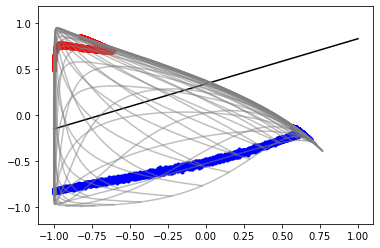

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(3, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
sgd = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=sgd,
              loss='mse',
              metrics=['accuracy'])

anim = animate_model(model)

HTML(anim.to_html5_video())




In [6]:
from IPython.display import HTML
import io
import base64

video = io.open('./3_hidden_units.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
</video>'''.format(encoded.decode('ascii')))
# HTML("""
# <div align="middle">
# <video width="80%" controls>
#       <source src="/content/3_hidden_units.mp4" type="video/mp4">
# </video></div>""")


In [0]:
import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print (x)
print (y)
xv, yv = np.meshgrid(x, y)

print (xv)
print (yv)
print (xv.shape)

[0.  0.5 1. ]
[0. 1.]
[[0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0. 0. 0.]
 [1. 1. 1.]]
(2, 3)


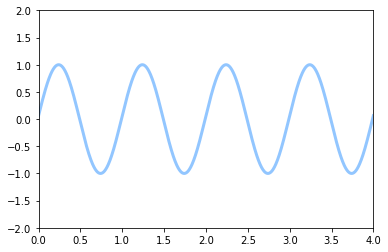

In [0]:
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=40, blit=True)

HTML(anim.to_html5_video())